# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

**Objetivo:**  
Desenvolver um modelo preditivo capaz de estimar a renda mensal de clientes com base em características demográficas, socioeconômicas e de estilo de vida. A previsão da renda é útil para apoiar decisões de crédito, políticas de marketing e análise de risco em instituições financeiras.

**Motivação:**  
A previsão da renda permite à empresa:
- Definir limites de crédito de forma mais segura.
- Identificar clientes com alto potencial financeiro.
- Personalizar ofertas de produtos e serviços.

**Questões principais:**
- Quais variáveis têm maior influência na renda dos clientes?
- É possível prever a renda com boa precisão a partir dos dados disponíveis?
- Há padrões ou perfis de clientes que indicam maior renda?
- Como o modelo pode ajudar nas estratégias de crédito e marketing?

## Etapa 2 Crisp-DM: Entendimento dos dados

 Dicionário de dados

"""
| Variável              | Descrição                                   | Tipo        |
|-----------------------|---------------------------------------------|-------------|
| data_ref              | Data de referência                          | Data        |
| id_cliente            | Identificador único do cliente              | Categórica  |
| sexo                  | Gênero do cliente                           | Categórica  |
| posse_de_veiculo      | Se possui veículo (sim/não)                 | Categórica  |
| posse_de_imovel       | Se possui imóvel (sim/não)                  | Categórica  |
| qtd_filhos            | Quantidade de filhos                        | Numérica    |
| tipo_renda            | Tipo de fonte de renda                      | Categórica  |
| educacao              | Nível de escolaridade                       | Categórica  |
| estado_civil          | Estado civil do cliente                     | Categórica  |
| tipo_residencia       | Tipo de residência                          | Categórica  |
| idade                 | Idade do cliente                            | Numérica    |
| tempo_emprego         | Tempo de emprego em anos                    | Numérica    |
| qt_pessoas_residencia | Número de pessoas na residência             | Numérica    |
| renda                 | Renda mensal do cliente                     | Numérica    |
"""

#### Carregando os pacotes

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Carregando os dados

In [39]:
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada

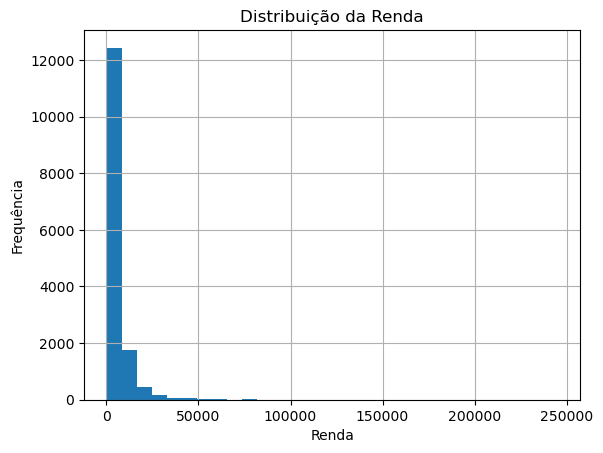

In [7]:
df.describe()
df.isnull().sum()
df["renda"].hist(bins=30)
plt.title("Distribuição da Renda")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.show()

### Entendimento dos dados - Bivariadas




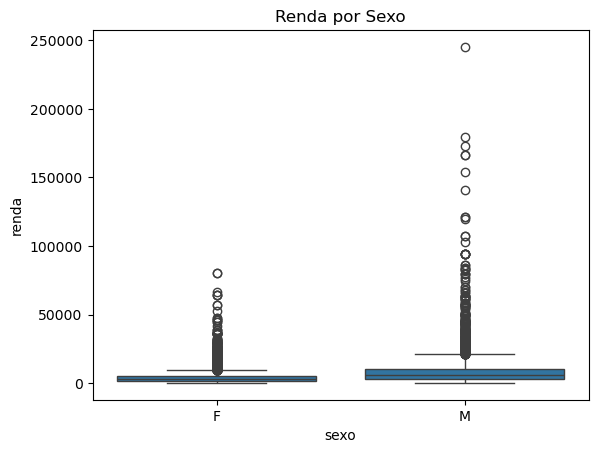

In [9]:
sns.boxplot(x="sexo", y="renda", data=df)
plt.title("Renda por Sexo")
plt.show()

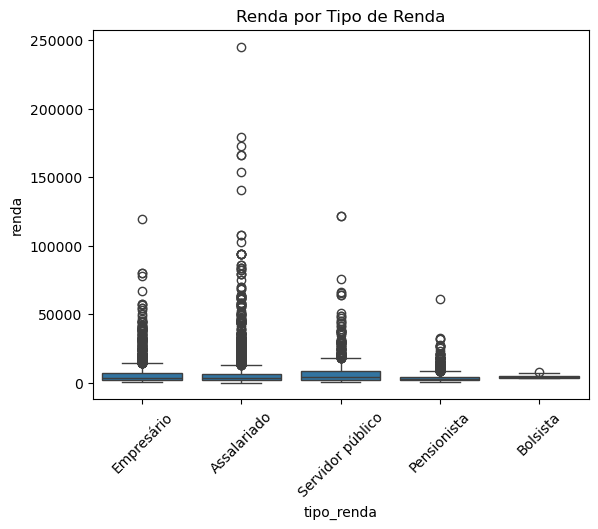

In [11]:
sns.boxplot(x="tipo_renda", y="renda", data=df)
plt.title("Renda por Tipo de Renda")
plt.xticks(rotation=45)
plt.show()

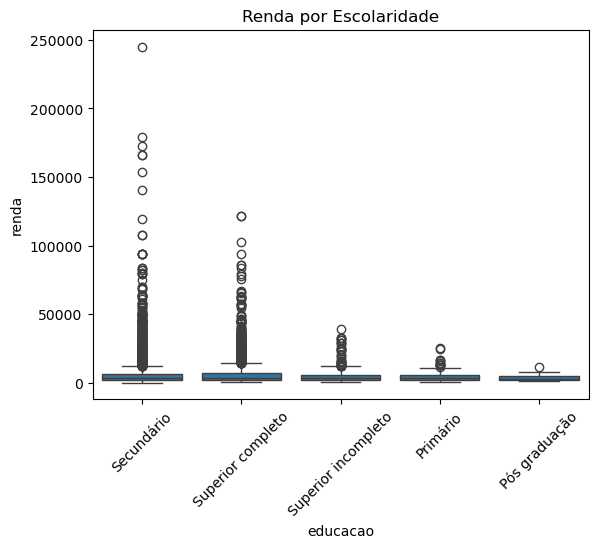

In [13]:
sns.boxplot(x="educacao", y="renda", data=df)
plt.title("Renda por Escolaridade")
plt.xticks(rotation=45)
plt.show()

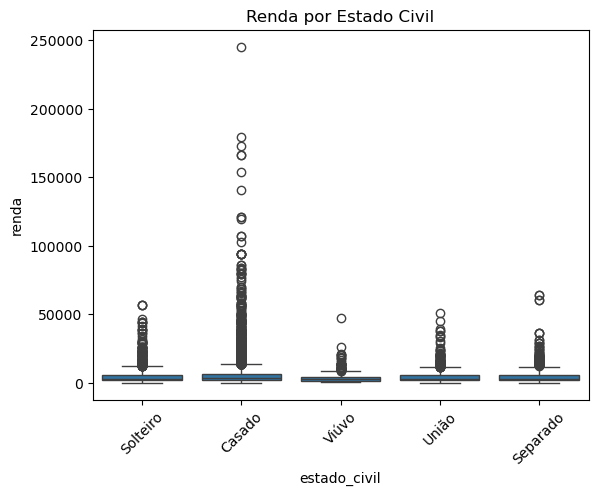

In [15]:
sns.boxplot(x="estado_civil", y="renda", data=df)
plt.title("Renda por Estado Civil")
plt.xticks(rotation=45)
plt.show()

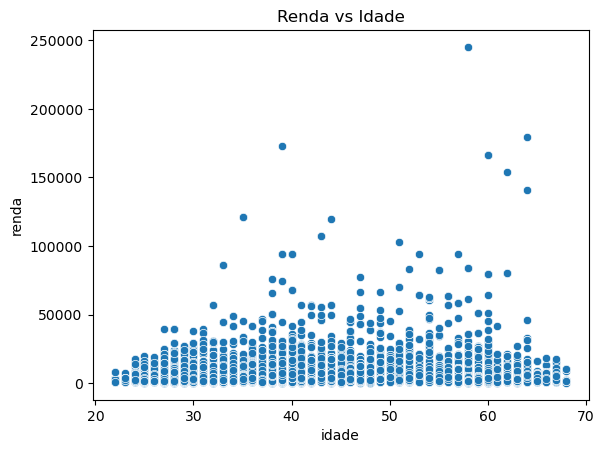

In [17]:
sns.scatterplot(x="idade", y="renda", data=df)
plt.title("Renda vs Idade")
plt.show()

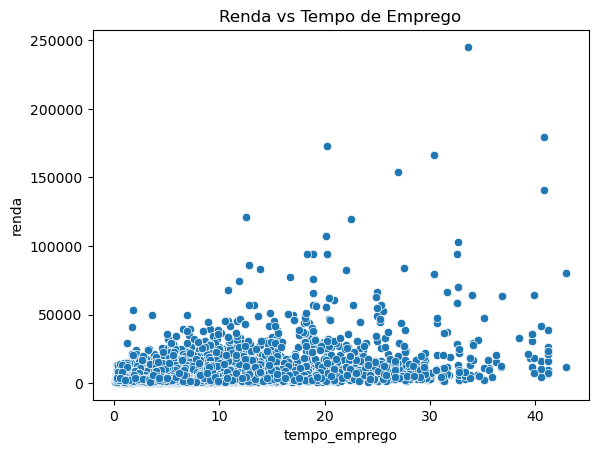

In [19]:
sns.scatterplot(x="tempo_emprego", y="renda", data=df)
plt.title("Renda vs Tempo de Emprego")
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



1. Seleção: removendo colunas que não serão usadas no modelo
Removemos id_cliente (identificador único) e data_ref (não contribui para a previsão)

In [29]:
# 2. Limpeza: tratamento de valores ausentes
# Substituímos os valores ausentes de tempo_emprego por 0 (sem emprego)
df["tempo_emprego"] = df["tempo_emprego"].fillna(0)

In [31]:
# Substituímos os valores ausentes de qt_pessoas_residencia pela mediana da coluna
df["qt_pessoas_residencia"] = df["qt_pessoas_residencia"].fillna(df["qt_pessoas_residencia"].median())

3. Construção: (opcional nesta etapa, pode ser incluída futuramente se necessário)
Nenhuma nova variável foi criada neste momento

4. Integração: não aplicável (apenas uma fonte de dados)

In [33]:
# 5. Formatação: convertendo tipos de dados e codificando categorias
# Convertendo data_ref para tipo datetime
df["data_ref"] = pd.to_datetime(df["data_ref"])

In [35]:
# Codificando variáveis categóricas com get_dummies, removendo id_cliente e data_ref
df_encoded = pd.get_dummies(df.drop(columns=["id_cliente", "data_ref"]))

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


1. Seleção da técnica de modelagem
Escolhemos a Regressão Linear por ser adequada para prever variáveis numéricas contínuas.

In [41]:
## 2. Desenho do teste
# Separamos os dados em treino (80%) e teste (20%)
X = df_encoded.drop("renda", axis=1)
y = df_encoded["renda"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
## 3. Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [57]:
# Salvar modelo treinado
with open("modelo_renda.pkl", "wb") as f:
    pickle.dump(modelo, f)

# Também salve as colunas usadas no treinamento para o app saber a ordem
with open("colunas_modelo.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


## Etapa 5 Crisp-DM: Avaliação dos resultados


In [45]:
previsoes = modelo.predict(X_test)

print("MAE:", mean_absolute_error(y_test, previsoes))
print("RMSE:", np.sqrt(mean_squared_error(y_test, previsoes)))
print("R²:", r2_score(y_test, previsoes))

MAE: 3492.7129015878018
RMSE: 5874.749157908573
R²: 0.2956609402831053


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Observação sobre a implantação
"
A aplicação web para previsão de renda foi desenvolvida utilizando o Streamlit fora do ambiente Jupyter Notebook.

Passos realizados:
- O modelo e as colunas utilizadas foram salvos com pickle (modelo_renda.pkl e modelo_colunas.pkl).
- Criamos um arquivo sepprojeto2_marcosdo `app.py` no VS Code, onde implementamos a interface do usuário usando Streamlit.
- O app permite que o usuário insira seus dados e receba a previsão de renda em tempo real.
- A execução foi feita com o comando: streaprojeto2_marcost run app.py

A decisão de utilizar o VS Code se deu por melhor compatibilidade com a execução do amlit.
"""
